In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage.draw

# Add LLMP module to system path
sys.path.append('/home/huuthanhvy.nguyen001/hpcstor6/LLMP/LLMP')
import LLMP as L


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
import os
import uuid
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Importing the GPImage class from the LLMP module
from LLMP import GPImage

# Function to generate images, save metadata, and create the dataset
def generate_image_dataset(num_images=450, angle_range=(1, 90)):
    """
    Generate a dataset of images with angles restricted to a specified range.
    
    Args:
    - num_images (int): Number of images to generate.
    - angle_range (tuple): A tuple specifying the minimum and maximum angles (inclusive).
    """
    # Directory name is dynamically based on the number of images
    output_dir = f'generated_images_{num_images}'
    
    # Create the directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # List to store metadata for each image
    dataset = []
    
    # Generate images for the specified number of angles within the range
    for i in range(1, num_images + 1):
        # Randomly generate an angle within the specified range
        angle = np.random.randint(angle_range[0], angle_range[1] + 1)

        # Generate the image for the current angle using GPImage class
        image_array, label = GPImage.figure1(task="angle", preset=angle)
        
        # Convert the image array to a PIL image
        pil_image = Image.fromarray((image_array * 255).astype(np.uint8))
        
        # Generate a unique ID for the image
        unique_id = str(uuid.uuid4())
        
        # Save the image with the unique ID
        image_filename = f'{output_dir}/{unique_id}.jpg'
        pil_image.save(image_filename)
        
        # Prepare the JSON data (metadata)
        json_data = {
            "id": unique_id,
            "image": f"{unique_id}.jpg",
            "angle": angle
        }
        
        # Add the metadata to the dataset list
        dataset.append(json_data)
    
    # Save the dataset as a JSON file
    json_filename = f'dataset_{num_images}.json'
    with open(json_filename, 'w') as json_file:
        json.dump(dataset, json_file, indent=4)
    
    print(f"Dataset generated with {num_images} images and saved in '{json_filename}'.")

# Example usage:
generate_image_dataset(7200, angle_range=(1, 90))  # Generate 450 images with angles from 1 to 90 degrees


Dataset generated with 7200 images and saved in 'dataset_7200.json'.


In [10]:
import pandas as pd
import json
import matplotlib.pyplot as plt

with open('dataset_7200.json', 'r') as json_file:
    dataset = json.load(json_file)

df = pd.DataFrame(dataset)

# Step 2: Print the DataFrame to verify the data
df.head()

,id,image,angle
0,72e5a110-ec0e-4751-b290-d53cf1a61f4a,72e5a110-ec0e-4751-b290-d53cf1a61f4a.jpg,43
1,4331f8db-0189-41cf-b822-429391d11385,4331f8db-0189-41cf-b822-429391d11385.jpg,44
2,a6a867e7-611b-4c84-ad53-18e6765fea4b,a6a867e7-611b-4c84-ad53-18e6765fea4b.jpg,72
3,cb6dd673-2d2e-47f6-9d0b-aa358243f4bf,cb6dd673-2d2e-47f6-9d0b-aa358243f4bf.jpg,64
4,5252cc2d-088a-4fea-a044-580e279306c7,5252cc2d-088a-4fea-a044-580e279306c7.jpg,15


## Display all values from the DataFrame without truncation

In [12]:
pd.set_option('display.max_rows', None)
df.groupby('angle').size().reset_index(name='count').sort_values(by='angle', ascending=True)


,angle,count
0,1,71
1,2,75
2,3,74
3,4,81
4,5,75
5,6,94
6,7,82
7,8,67
8,9,66
9,10,79


## Display all 90 degrees

Enter the minimum angle (1 to 90):  1
Enter the maximum angle (1 to 90):  1


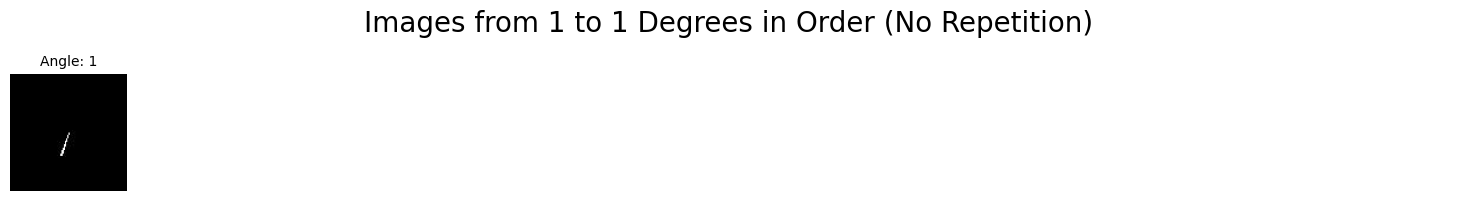

In [15]:
import os
import json
import matplotlib.pyplot as plt
from PIL import Image

# Load the dataset JSON file
with open('dataset_3600.json', 'r') as f:
    dataset = json.load(f)

# Directory where images are stored
image_dir = 'generated_images_3600'

# Ask the user to input the desired angle range
min_angle = int(input("Enter the minimum angle (1 to 90): "))
max_angle = int(input("Enter the maximum angle (1 to 90): "))

# Ensure the inputs are within the valid range
min_angle = max(1, min(min_angle, 90))  # Limit to between 1 and 90
max_angle = max(1, min(max_angle, 90))  # Limit to between 1 and 90

# Dictionary to keep track of the first occurrence of each angle in the selected range
unique_angles = {}
for item in dataset:
    angle = item['angle']
    if min_angle <= angle <= max_angle and angle not in unique_angles:
        unique_angles[angle] = item  # Store the first occurrence of each angle

# Sort the dictionary by angle to ensure angles are in order
sorted_unique_angles = sorted(unique_angles.items())

# Set up the grid for displaying images
num_images = len(sorted_unique_angles)
num_cols = 9  # 9 columns for a 9x10 grid
num_rows = num_images // num_cols + int(num_images % num_cols != 0)  # Calculate number of rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2))
fig.suptitle(f'Images from {min_angle} to {max_angle} Degrees in Order (No Repetition)', fontsize=20)

# Iterate over the sorted dataset and plot the images with corresponding angles
for i, (angle, item) in enumerate(sorted_unique_angles):
    # Load the image
    image_path = os.path.join(image_dir, item['image'])
    img = Image.open(image_path)
    
    # Display the image in the subplot
    ax = axes.flat[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Turn off axis lines and labels
    
    # Set the title of each subplot to the corresponding angle
    ax.set_title(f"Angle: {angle}", fontsize=10)

# Hide any remaining subplots if the grid has extra spaces
for ax in axes.flat[i+1:]:
    ax.axis('off')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Enter the minimum angle (1 to 90):  42
Enter the maximum angle (1 to 90):  42


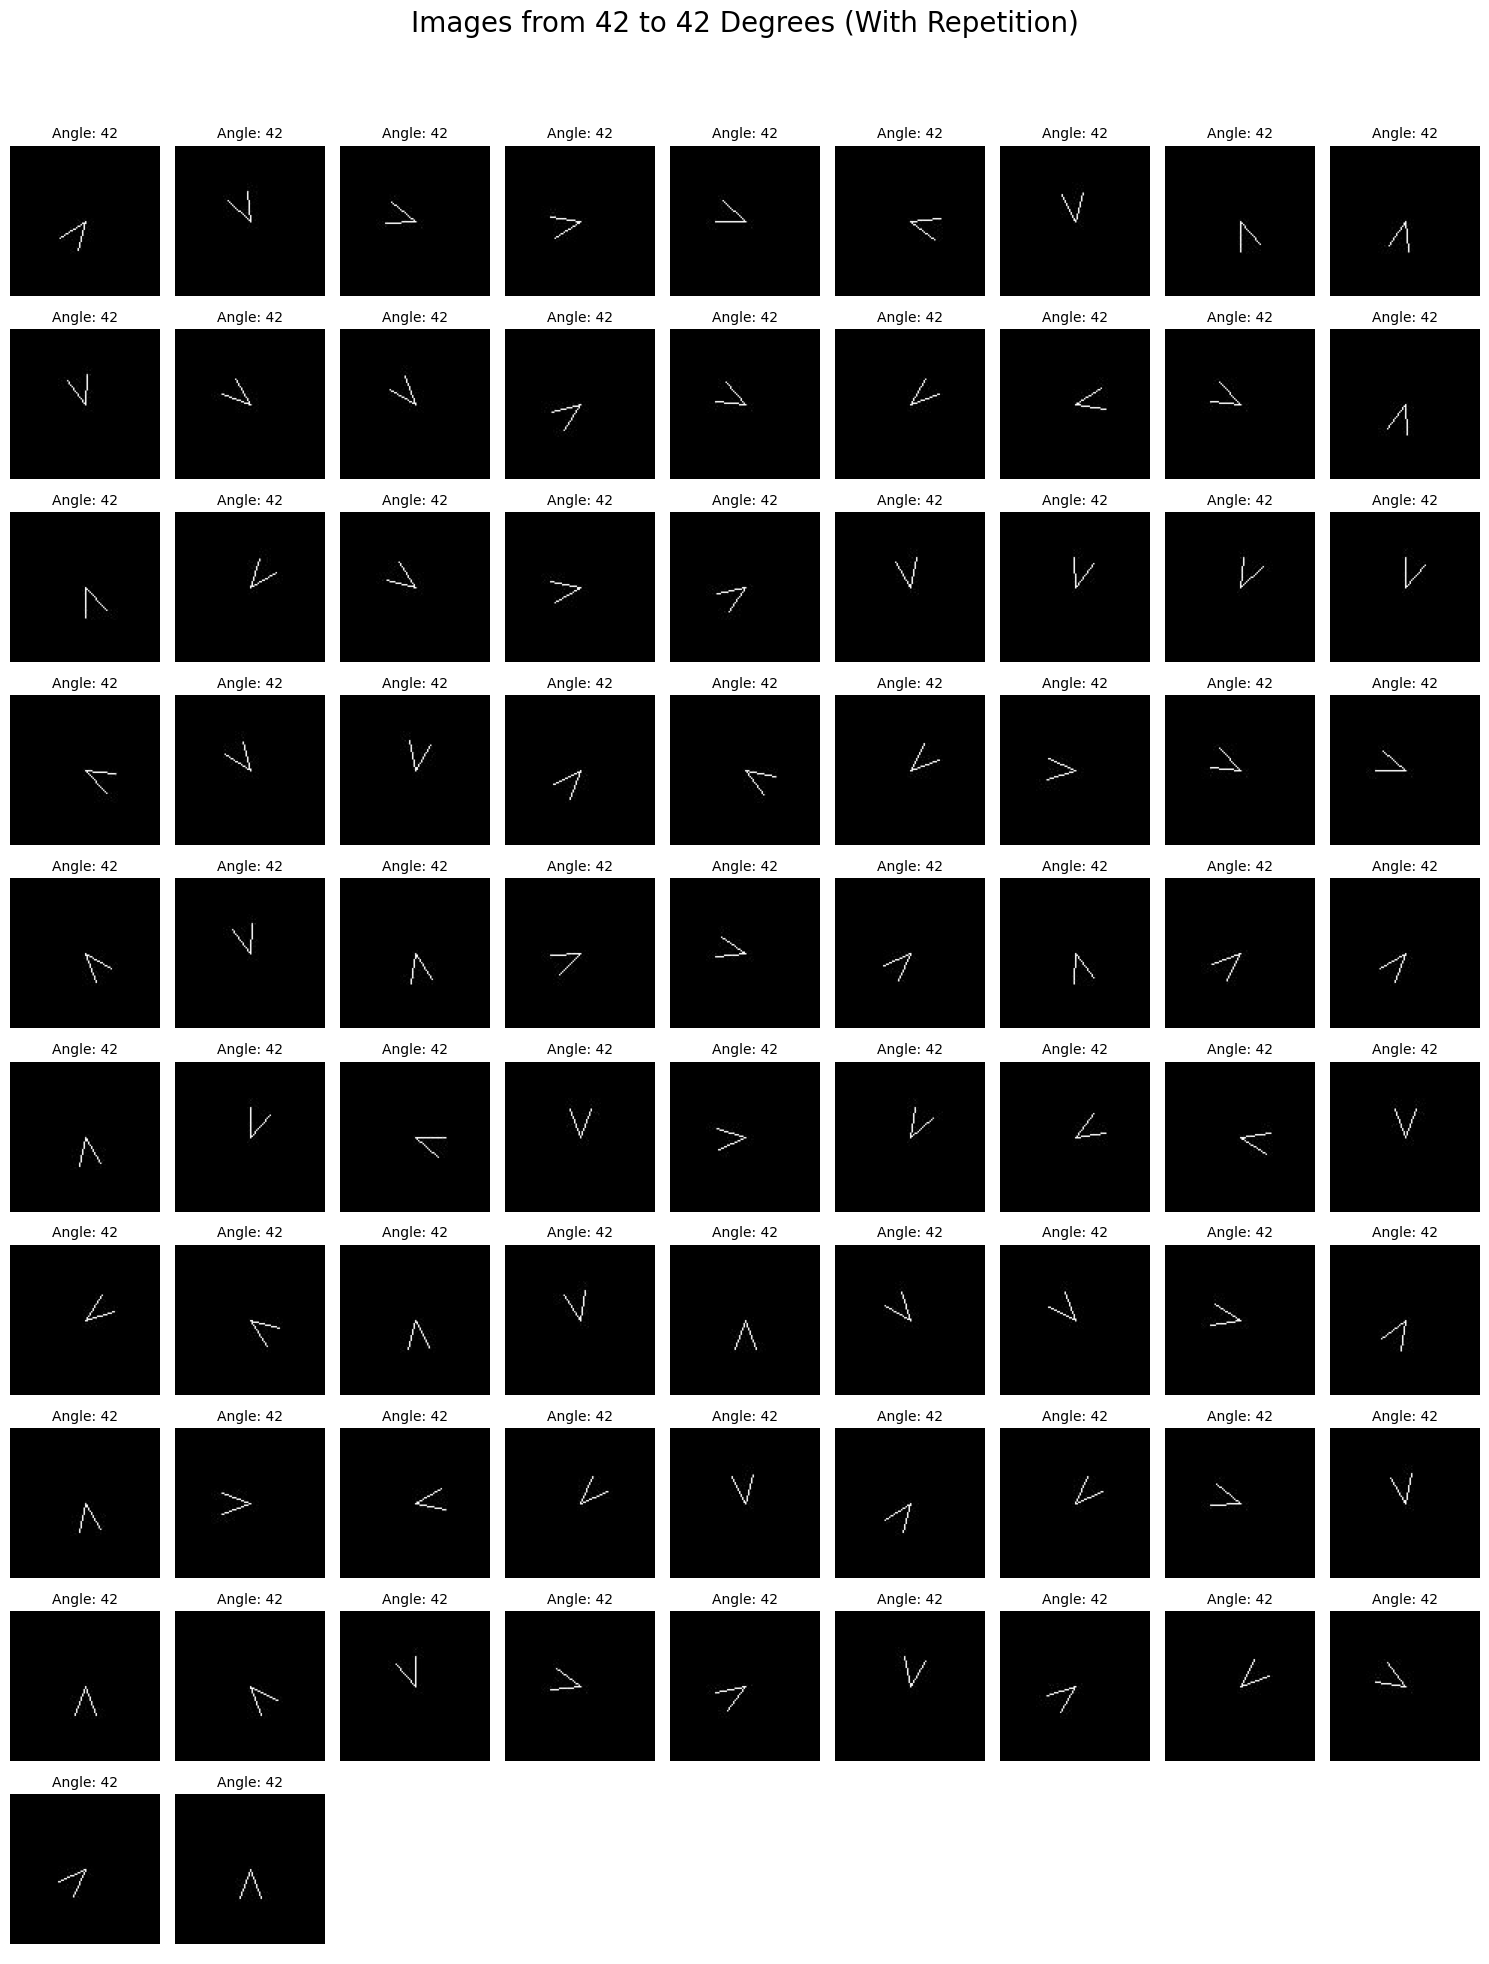

In [23]:
import os
import json
import matplotlib.pyplot as plt
from PIL import Image
import random

# Load the dataset JSON file
with open('dataset_7200.json', 'r') as f:
    dataset = json.load(f)

# Directory where images are stored
image_dir = 'generated_images_7200'

# Ask the user to input the desired angle range
min_angle = int(input("Enter the minimum angle (1 to 90): "))
max_angle = int(input("Enter the maximum angle (1 to 90): "))

# Ensure the inputs are within the valid range
min_angle = max(1, min(min_angle, 90))  # Limit to between 1 and 90
max_angle = max(1, min(max_angle, 90))  # Limit to between 1 and 90

# Filter the dataset for the selected angle range
filtered_items = [item for item in dataset if min_angle <= item['angle'] <= max_angle]

# Set up the grid for displaying images
num_images = len(filtered_items)
num_cols = 9  # 9 columns for a 9xN grid
num_rows = num_images // num_cols + int(num_images % num_cols != 0)  # Calculate number of rows

# Define background colors for plots (you can customize these)
background_colors = ['#f4f4f4', '#e6e6e6', '#dcdcdc', '#cccccc', '#bfbfbf', '#b3b3b3']

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2))
fig.suptitle(f'Images from {min_angle} to {max_angle} Degrees (With Repetition)', fontsize=20)

# Iterate over the filtered dataset and plot the images with corresponding angles
for i, item in enumerate(filtered_items):
    # Load the image
    image_path = os.path.join(image_dir, item['image'])
    img = Image.open(image_path)
    
    # Display the image in the subplot
    ax = axes.flat[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Turn off axis lines and labels
    
    # Set the background color of each plot (randomly selected from the list)
    ax.set_facecolor(random.choice(background_colors))
    
    # Set the title of each subplot to the corresponding angle with black color
    ax.set_title(f"Angle: {item['angle']}", fontsize=10, color='black')

# Hide any remaining subplots if the grid has extra spaces
for ax in axes.flat[i+1:]:
    ax.axis('off')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
